In [1]:
import os
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

In [2]:
MAP_FLOWERS = {
    0: 'daisy', 1: 'dandelion', 2: 'rose',
    3: 'sunflower', 4: 'tulip'
}

IMG_SIZE = 64

In [3]:
def load_train_set(dirname, map_pieces, verbose=True):
	X = []
	y = []
	for label, character in map_pieces.items():
		files = os.listdir(os.path.join(dirname, character))
		images = [file for file in files if file.endswith("jpg")]
		if verbose:
			print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
		for image_name in images:
			image = cv2.imread(os.path.join(dirname, character, image_name))
			X.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
			y.append(label)
	return np.array(X), np.array(y)

In [4]:
X, y = load_train_set("dataset-flores/train", MAP_FLOWERS)

Leyendo 501 imágenes encontradas de daisy
Leyendo 646 imágenes encontradas de dandelion
Leyendo 497 imágenes encontradas de rose
Leyendo 495 imágenes encontradas de sunflower
Leyendo 607 imágenes encontradas de tulip


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
perm = np.random.permutation(len(X_train))
X_train, y_train = X_train[perm], y_train[perm]

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  plt.colorbar()
  plt.grid(False)
  plt.show()

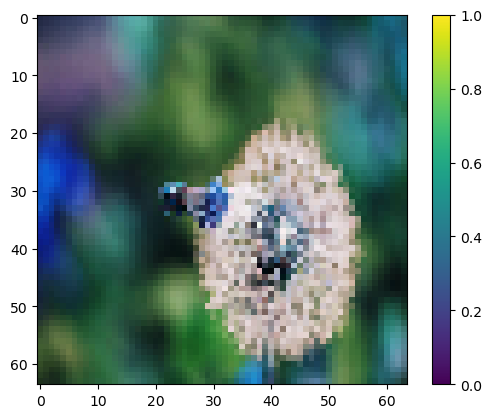

dandelion
(64, 64, 3)


In [9]:
visualize_example(X_train[75]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_FLOWERS[y_train[75]]) # Acceso al diccionario
print(X_train[75].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

In [10]:
num_classes=5
epochs=5
img_rows,img_cols=IMG_SIZE,IMG_SIZE
input_shape=(img_rows,img_cols,3) #(64,64,3)

In [11]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [24]:
model = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), data_format="channels_last",input_shape=(64, 64, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l2=0.02)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(5, activation='softmax', kernel_regularizer=keras.regularizers.L1L2(l2=0.02))
])

model.compile(
  optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

history=model.fit(X_train, y_train, epochs=30, validation_split = 0.10)

Epoch 1/30
62/62 [==============================] - 3s 35ms/step - loss: 5.7642 - accuracy: 0.3543 - val_loss: 1.8245 - val_accuracy: 0.4136
Epoch 2/30
62/62 [==============================] - 2s 32ms/step - loss: 1.4889 - accuracy: 0.4332 - val_loss: 1.5646 - val_accuracy: 0.4136
Epoch 3/30
62/62 [==============================] - 2s 33ms/step - loss: 1.3510 - accuracy: 0.4803 - val_loss: 1.3309 - val_accuracy: 0.5000
Epoch 4/30
62/62 [==============================] - 2s 32ms/step - loss: 1.2653 - accuracy: 0.5354 - val_loss: 1.2266 - val_accuracy: 0.5364
Epoch 5/30
62/62 [==============================] - 2s 33ms/step - loss: 1.1980 - accuracy: 0.5658 - val_loss: 1.1551 - val_accuracy: 0.5773
Epoch 6/30
62/62 [==============================] - 2s 32ms/step - loss: 1.1476 - accuracy: 0.5997 - val_loss: 1.0939 - val_accuracy: 0.6455
Epoch 7/30
62/62 [==============================] - 2s 33ms/step - loss: 1.1220 - accuracy: 0.6210 - val_loss: 1.0876 - val_accuracy: 0.6045
Epoch 8/30
62

In [14]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

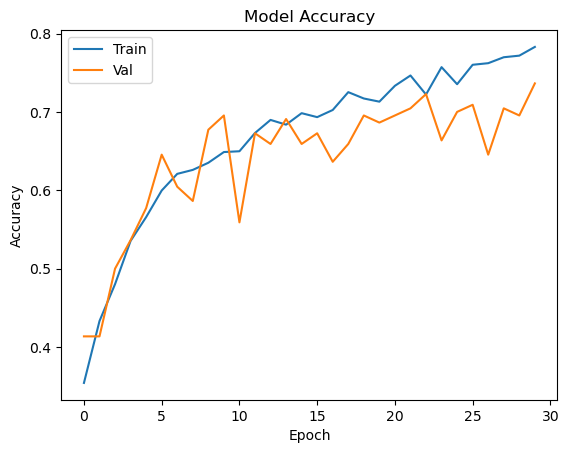

In [25]:
plot_acc(history)

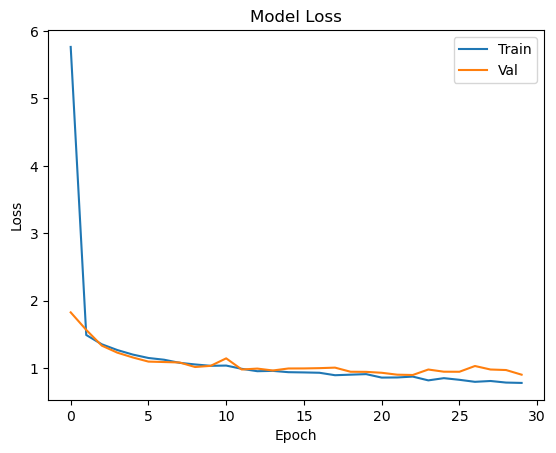

In [26]:
plot_loss(history)

In [27]:
model.evaluate(X_test, y_test, batch_size=32, verbose=1)

18/18 [==============================] - 0s 10ms/step - loss: 0.8567 - accuracy: 0.7491


[0.8567249774932861, 0.7490909099578857]